In [ ]:
# Andrea Mercado Jiménez
# Examen 3er Parcial 

In [1]:
!pip install tensorflow

     ---------------------------------------- 0.0/49.8 kB ? eta -:--:--
     -------------------------------- ------- 41.0/49.8 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 49.8/49.8 kB 841.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/376.0 MB 1.6 MB/s eta 0:04:02
   ---------------------------------------- 0.1/376.0 MB 804.6 kB/s eta 0:07:48
   ---------------------------------------- 0.2/376.0 MB 1.0 MB/s eta 0:06:02
   ---------------------------------------- 0.3/376.0 MB 1.3 MB/s eta 0:04:57
   ---------------------------------------- 0.4/376.0 MB 1.5 MB/s eta 0:04:18
   ---------------------------------------- 0.6/376.0 MB 1.7 MB/s eta 0:03:47
   ---------------------------------------- 0.7/376.0 MB 1.8 MB/s eta 0:03:32
   ---------------------------------------- 0.8/376.0 MB 1.8 MB/s eta 0:03:23
   ---------------------------------------- 0.9/376.0 MB 1.9 MB/s eta 0

In [54]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [27]:
ruta_dataset = r"C:\Users\andim\OneDrive\Escritorio\Sexto Semestre\Modelos Computacionales II\Brain Tumor"
ruta_csv = r"C:\Users\andim\OneDrive\Escritorio\Sexto Semestre\Modelos Computacionales II\Brain Tumor.csv"

df = pd.read_csv(ruta_csv)

In [28]:
df['Image'] = df['Image'].astype(str) + ".jpg"

df['filepath'] = df['Image'].apply(lambda x: os.path.join(ruta_dataset, x))

df['Class'] = pd.to_numeric(df['Class'], errors='coerce')

In [22]:
# Crear dataset de TensorFlow
filepaths = df['filepath'].values
labels = df['Class'].values

dataset = tf.data.Dataset.from_tensor_slices((filepaths, labels))

In [23]:
# Cargar y preprocesar imagen
def load_image(filepath, label):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    image = image / 255.0
    return image, label

dataset = dataset.map(load_image)

In [25]:
# Dividir dataset en entrenamiento y validación
total = len(filepaths)
train_size = int(0.8 * total)

train_dataset = dataset.take(train_size).batch(32).shuffle(1000)
val_dataset = dataset.skip(train_size).batch(32)

In [31]:
# Modelo CNN básico
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
# Entrenar modelo
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10)

print("Accuracy final en validación:", history.history['val_accuracy'][-1])

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 56s 523ms/step - accuracy: 0.7035 - loss: 0.6117 - val_accuracy: 0.7875 - val_loss: 0.5222
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 48s 479ms/step - accuracy: 0.8205 - loss: 0.4232 - val_accuracy: 0.7663 - val_loss: 0.5518
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 50s 486ms/step - accuracy: 0.8441 - loss: 0.3603 - val_accuracy: 0.8473 - val_loss: 0.3739
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 51s 505ms/step - accuracy: 0.8923 - loss: 0.2658 - val_accuracy: 0.8313 - val_loss: 0.4025
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 48s 484ms/step - accuracy: 0.9231 - loss: 0.2109 - val_accuracy: 0.8486 - val_loss: 0.3918
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 47s 472ms/step - accuracy: 0.9338 - loss: 0.1732 - val_accuracy: 0.8884 - val_loss: 0.3004
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 47s 469ms/step - accuracy: 0.9475 - loss: 0.1309 - val_accuracy: 0.8805 - val_loss: 0.3563
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 83s 487ms/step - accuracy: 0.9661 - loss: 0.0914 - val_accu

In [47]:
# Modelo CNN mejorado

model_mejorado = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_mejorado.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [48]:
#Entrenar modelo
history_mejorado = model_mejorado.fit(train_dataset, validation_data=val_dataset, epochs=10)

print("Accuracy final validación modelo mejorado:", history_mejorado.history['val_accuracy'][-1])

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.6753 - loss: 5.0548 - val_accuracy: 0.6574 - val_loss: 0.6806
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.7814 - loss: 0.5131 - val_accuracy: 0.6614 - val_loss: 0.7253
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.7858 - loss: 0.5061 - val_accuracy: 0.6959 - val_loss: 0.6739
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 89s 916ms/step - accuracy: 0.8344 - loss: 0.4318 - val_accuracy: 0.6680 - val_loss: 0.6625
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 89s 919ms/step - accuracy: 0.8277 - loss: 0.4568 - val_accuracy: 0.7145 - val_loss: 0.6332
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 89s 915ms/step - accuracy: 0.8177 - loss: 0.4674 - val_accuracy: 0.7317 - val_loss: 0.6268
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 88s 907ms/step - accuracy: 0.8121 - loss: 0.4382 - val_accuracy: 0.7636 - val_loss: 0.5526
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 88s 906ms/step - accuracy: 0.7648 - loss: 0.5015 - val_accuracy: 

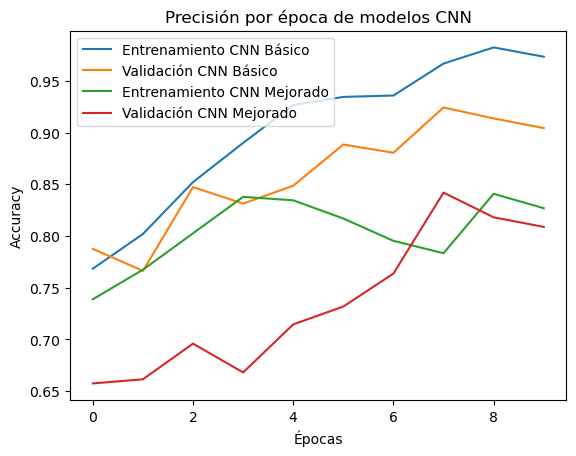

In [49]:
# Graficar accuracy para ambos modelos
plt.plot(history.history['accuracy'], label='Entrenamiento CNN Básico')
plt.plot(history.history['val_accuracy'], label='Validación CNN Básico')

plt.plot(history_mejorado.history['accuracy'], label='Entrenamiento CNN Mejorado')
plt.plot(history_mejorado.history['val_accuracy'], label='Validación CNN Mejorado')

plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.title('Precisión por época de modelos CNN')
plt.legend()
plt.show()

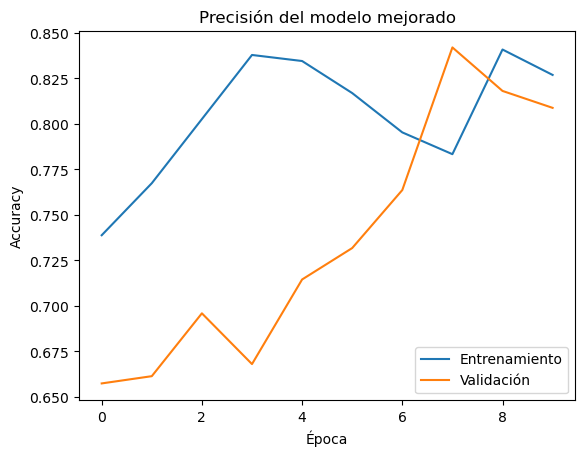

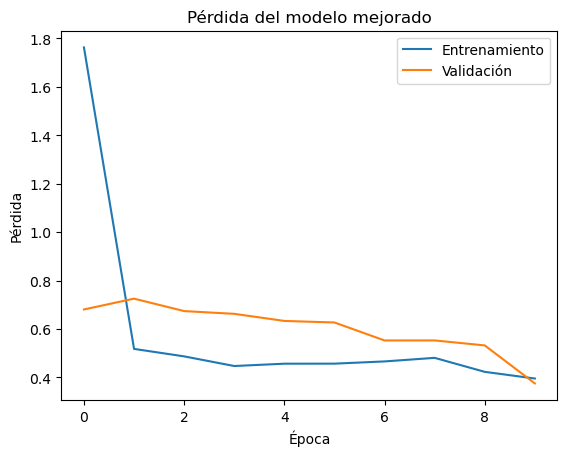

In [50]:
# Accuracy
plt.plot(history_mejorado.history['accuracy'], label='Entrenamiento')
plt.plot(history_mejorado.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Precisión del modelo mejorado')
plt.legend()
plt.show()

# Pérdida
plt.plot(history_mejorado.history['loss'], label='Entrenamiento')
plt.plot(history_mejorado.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida del modelo mejorado')
plt.legend()
plt.show()


In [51]:
# Random Forest con características del CSV

# Eliminamos columnas no numéricas y etiquetas
X = df.drop(columns=['Image', 'filepath', 'Class'])
y = df['Class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

acc_rf = accuracy_score(y_val, y_pred)
print("Accuracy Random Forest:", acc_rf)

Accuracy Random Forest: 0.9840637450199203


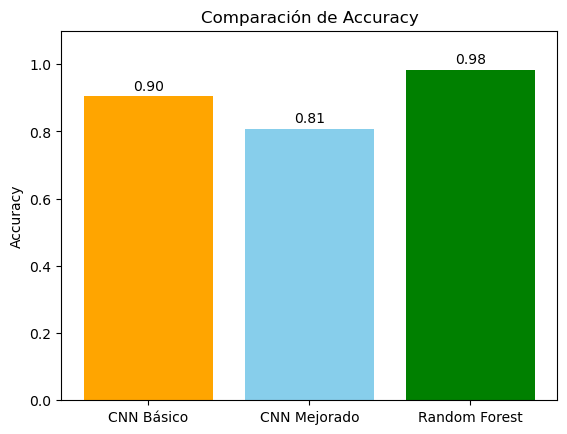

In [56]:
# Datos de accuracy
accuracies = [
    history.history['val_accuracy'][-1],
    history_mejorado.history['val_accuracy'][-1],
    acc_rf
]

labels = ['CNN Básico', 'CNN Mejorado', 'Random Forest']

bars = plt.bar(labels, accuracies, color=['orange', 'skyblue', 'green'])

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.2f}', ha='center', va='bottom', fontsize=10)

plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy')
plt.ylim(0, 1.1)
plt.show()

24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 224ms/step


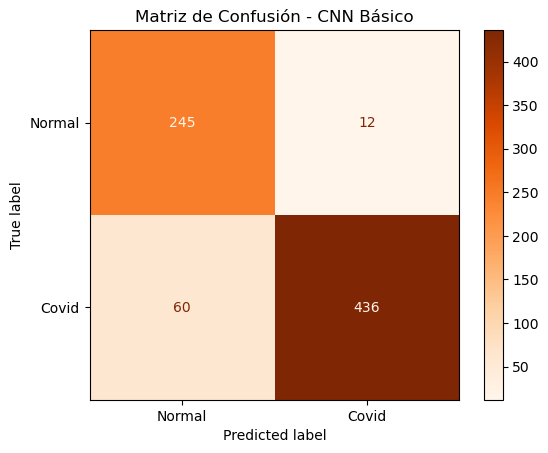

24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 349ms/step


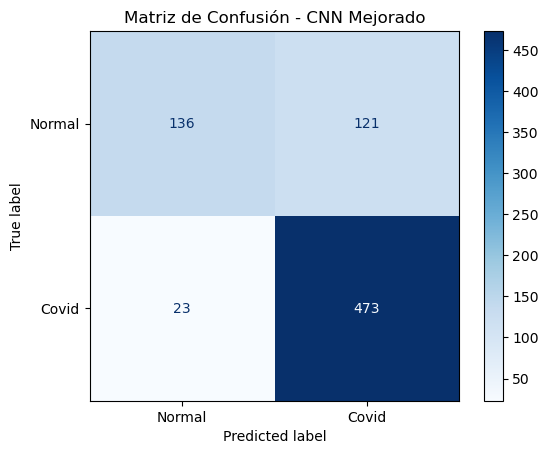

In [55]:
# Obtener etiquetas verdaderas del conjunto de validación
y_true = []
for _, labels in val_dataset:
    y_true.extend(labels.numpy())

# CNN Básico
y_pred_basic = model.predict(val_dataset)
y_pred_basic = (y_pred_basic > 0.5).astype(int).flatten()

cm_basic = confusion_matrix(y_true, y_pred_basic)
disp_basic = ConfusionMatrixDisplay(confusion_matrix=cm_basic, display_labels=['Normal', 'Covid'])
disp_basic.plot(cmap='Oranges')
plt.title("Matriz de Confusión - CNN Básico")
plt.show()

# CNN Mejorado
y_pred_mejorado = model_mejorado.predict(val_dataset)
y_pred_mejorado = (y_pred_mejorado > 0.5).astype(int).flatten()

cm_mejorado = confusion_matrix(y_true, y_pred_mejorado)
disp_mejorado = ConfusionMatrixDisplay(confusion_matrix=cm_mejorado, display_labels=['Normal', 'Covid'])
disp_mejorado.plot(cmap='Blues')
plt.title("Matriz de Confusión - CNN Mejorado")
plt.show()